In [12]:
import h5py 
import numpy as np
from scipy.optimize import linear_sum_assignment


with h5py.File("model_data_6_0.9/E0_t_U_3_r2.4.hdf5","r") as f:
    print(f.keys())
    distance = f["distance"][:]
    test_states = f["state_ind_for_test"][:]
    nroots = 36
    col_ind = f["col_ind"][()]

print(col_ind)
x = np.delete(np.arange(0, nroots), col_ind)
dist = distance[test_states][:, x]
rows, cols = linear_sum_assignment(dist)

test_loss = np.sum(dist[rows, cols])
print(rows, cols, test_loss)
print(distance)

<KeysViewHDF5 ['ai_spectrum_range (Ha)', 'col_ind', 'distance', 'dmd_params', 'iterations', 'loss_loss', 'norm', 'nstates_test', 'nstates_train', 'para_w_0', 'para_w_1', 'penalty', 'rdmd_params', 'row_ind', 'state_ind_for_test', 'termination_message', 'test_cols', 'test_dloss', 'test_loss', 'test_rows', 'test_sloss', 'train', 'train_dloss', 'train_loss', 'train_sloss']>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]
[0] [0] 54.96537338094199
[[7.64212498e-02 7.92110474e-02 4.80874594e-01 ... 7.07291526e+01
  8.05172598e+01 8.20862391e+01]
 [9.13794611e-02 9.26450891e-02 4.72768893e-01 ... 7.03110825e+01
  8.00776500e+01 8.16451050e+01]
 [5.94057903e-01 4.71706553e-01 9.62680874e-02 ... 5.99611488e+01
  6.89721540e+01 7.04159921e+01]
 ...
 [1.76797300e-01 1.67560800e-01 1.08202806e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.76797300e-01 1.67560800e-01 1.08202806e-01 ... 0.00000000e+00
  0.00000000e+00 0.0000000

In [17]:
row_ind, col_ind = linear_sum_assignment(distance)
row_ind = row_ind[:6]
col_ind = col_ind[:6]
print(row_ind, col_ind)
print(distance[test_states, col_ind[test_states]])

[0 1 2 3 4 5] [0 1 2 3 5 4]
[0.3100721]


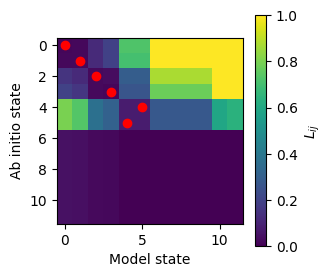

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
cmap = plt.imshow(distance[0:12,0:12], vmax = 4)
plt.scatter(col_ind, row_ind, color = "red")
plt.colorbar(label = "$L_{ij}$")
plt.ylabel("Ab initio state")
plt.xlabel("Model state")
plt.savefig("Matching.pdf", bbox_inches='tight', transparent=True)